# Environment setting

In [1]:
!git clone https://github.com/Amirsamana/tran.git#https://github.com/juhannam/gct634-2020.git

Cloning into 'gct634-2020'...
remote: Enumerating objects: 228, done.
remote: Counting objects: 100% (228/228), done.
remote: Compressing objects: 100% (159/159), done.
remote: Total 228 (delta 114), reused 162 (delta 62), pack-reused 0
Receiving objects: 100% (228/228), 16.74 MiB | 19.01 MiB/s, done.
Resolving deltas: 100% (114/114), done.


In [2]:
%cd tran#gct634-2020/hw3

/content/gct634-2020/hw3


In [3]:
!gdown --id 1wvN_ZWDiss1YCpC7GAPBMMlyrFYOB6NZ

Downloading...
From: https://drive.google.com/uc?id=1wvN_ZWDiss1YCpC7GAPBMMlyrFYOB6NZ
To: /content/gct634-2020/hw3/maestro_small.zip
1.14GB [00:10, 105MB/s] 


In [4]:
!unzip -q maestro_small.zip

In [1]:
!ls data

2004  2006  2008  2009	2011  2013  2014  2015	2017  2018  data.json


In [2]:
import torch as th
print(th.__version__)

1.7.0


If torch version == 1.6.x, install torchaudio==0.6

In [ ]:
!sudo apt-get install fluidsynth

[sudo] password for amirsaman: 

In [36]:
!pip install torchaudio tqdm soundfile mir_eval pretty_midi pyFluidSynth 

# Checkout dataset(same as notebooks.dataset.ipynb)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from dataset import MAESTRO_small
from constants import HOP_SIZE

In [4]:
import soundfile as sf



sf.available_formats()
#sf.available_subtypes(format='FLAC')

data, samplerate = sf.read('/home/amirsaman/Music_HW/HW3/data/2004/MIDI-Unprocessed_SMF_07_R1_2004_01_ORIG_MID--AUDIO_07_R1_2004_12_Track12_wav.flac')
#sf.write('new_file.flac', data, samplerate)

In [3]:
example_dataset = MAESTRO_small(path='data', groups=['debug'], sequence_length=None, random_sample=True)

Loading group debug:   0%|          | 0/10 [00:00<?, ?it/s]

Loading 1 group of MAESTRO_small at data


Loading group debug: 100%|██████████| 10/10 [00:08<00:00,  1.21it/s]


In [8]:
data = example_dataset[1]
print(f'data: {data}')
print(f'audio_shape: {data["audio"].shape}')
print(f'frame_roll_shape: {data["frame"].shape}')
print(f'onset_roll_shape: {data["onset"].shape}')

print(f'HOP_SIZE({HOP_SIZE}) x piano_roll length({data["frame"].shape[0]}): {HOP_SIZE*data["frame"].shape[0]}')

data: {'path': 'data/2004/MIDI-Unprocessed_SMF_12_01_2004_01-05_ORIG_MID--AUDIO_12_R1_2004_08_Track08_wav.flac', 'audio': tensor([-0.0002, -0.0002, -0.0001,  ...,  0.0149,  0.0022, -0.0390]), 'frame': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), 'onset': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])}
audio_shape: torch.Size([5411840])
frame_roll_shape: torch.Size([10570, 88])
onset_roll_shape: torch.Size([10570, 88])
HOP_SIZE(512) x piano_roll length(10570): 5411840


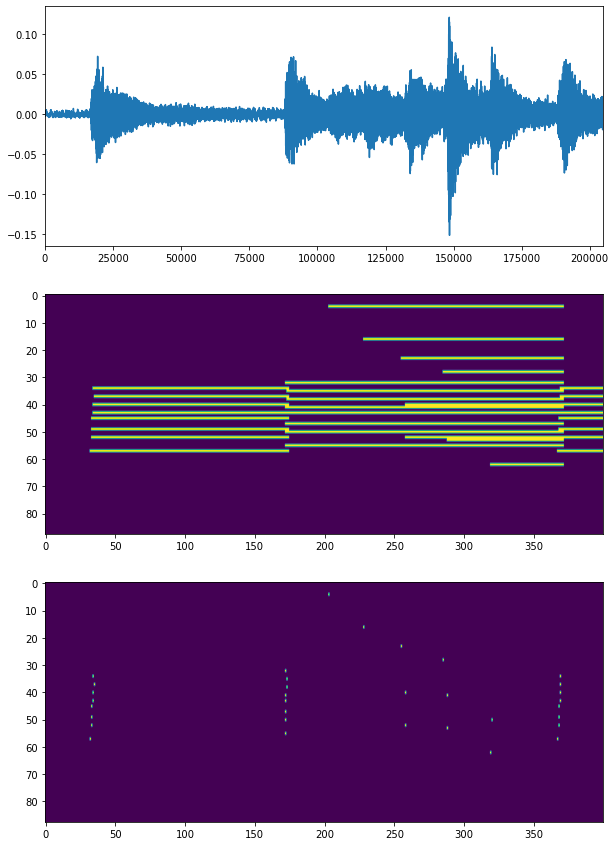

In [6]:
plt.figure(figsize=(10,15))
plt.subplot(311)
plt.plot(data['audio'].numpy()[:400*HOP_SIZE])
plt.autoscale(enable=True, axis='x', tight=True)
plt.subplot(312)
plt.imshow(data['frame'].numpy()[:400].T, aspect='auto')#, origin='bottom')
plt.subplot(313)
plt.imshow(data['onset'].numpy()[:400].T, aspect='auto')#, origin='bottom')

# Train 1k (Baseline)

In [7]:
! python train.py -i=1000 -vi=500 --save_midi

/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torchaudio/backend/utils.py:53: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(
Loading 1 group of MAESTRO_small at data
Loading group train: 100%|████████████████████| 100/100 [00:54<00:00,  1.84it/s]
Loading 1 group of MAESTRO_small at data
  0%|                                                  | 0/1000 [00:00<?, ?it/s]/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /opt/conda/conda-bld/pyto

In [54]:
! python train.py -i=1000 -vi=500 --model_type 'rnn' --save_midi

/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torchaudio/backend/utils.py:53: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(
Loading 1 group of MAESTRO_small at data
Loading group train: 100%|████████████████████| 100/100 [00:54<00:00,  1.82it/s]
Loading 1 group of MAESTRO_small at data
  0%|                                                  | 0/1000 [00:00<?, ?it/s]/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /opt/conda/conda-bld/pyto

In [56]:
! python train.py -i=1000 -vi=500 --model_type 'crnn' --save_midi

/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torchaudio/backend/utils.py:53: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(
Loading 1 group of MAESTRO_small at data
Loading group train: 100%|████████████████████| 100/100 [00:57<00:00,  1.74it/s]
Loading 1 group of MAESTRO_small at data
  0%|                                                  | 0/1000 [00:00<?, ?it/s]/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /opt/conda/conda-bld/pyto

In [70]:
! python train.py -i=1000 -vi=500 --model_type 'ONF' --save_midi

/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torchaudio/backend/utils.py:53: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(
Loading 1 group of MAESTRO_small at data
Loading group train: 100%|████████████████████| 100/100 [00:59<00:00,  1.69it/s]
Loading 1 group of MAESTRO_small at data
  0%|                                                  | 0/1000 [00:00<?, ?it/s]/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /opt/conda/conda-bld/pyto

In [85]:
! python train.py --model_type 'rnn' --save_midi

/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torchaudio/backend/utils.py:53: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(
Loading 1 group of MAESTRO_small at data
Loading group train: 100%|████████████████████| 100/100 [00:55<00:00,  1.80it/s]
Loading 1 group of MAESTRO_small at data
  0%|                                                 | 0/10000 [00:00<?, ?it/s]/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /opt/conda/conda-bld/pyto

fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed 

In [86]:
! python train.py --model_type 'crnn' --save_midi

/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torchaudio/backend/utils.py:53: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(
Loading 1 group of MAESTRO_small at data
Loading group train: 100%|████████████████████| 100/100 [00:53<00:00,  1.85it/s]
Loading 1 group of MAESTRO_small at data
  0%|                                                 | 0/10000 [00:00<?, ?it/s]/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /opt/conda/conda-bld/pyto

fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed 

In [87]:
! python train.py --model_type 'ONF' --save_midi

/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torchaudio/backend/utils.py:53: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(
Loading 1 group of MAESTRO_small at data
Loading group train: 100%|████████████████████| 100/100 [00:52<00:00,  1.89it/s]
Loading 1 group of MAESTRO_small at data
  0%|                                                 | 0/10000 [00:00<?, ?it/s]/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /opt/conda/conda-bld/pyto

fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed 

In [92]:
! python train.py --model_type 'ONF2' --save_midi

/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torchaudio/backend/utils.py:53: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(
Loading 1 group of MAESTRO_small at data
Loading group train: 100%|████████████████████| 100/100 [00:58<00:00,  1.71it/s]
Loading 1 group of MAESTRO_small at data
  0%|                                                 | 0/10000 [00:00<?, ?it/s]/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /opt/conda/conda-bld/pyto

fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed to pin the sample data to RAM; swapping is possible.
fluidsynth: warning: Failed 

In [ ]:
! python train.py --model_type 'ONF3'

In [ ]:
! python train.py --model_type 'ONF4'

In [ ]:
! python train.py --model_type 'ONF4'

In [ ]:
! python train.py --model_type 'transformer'

In [ ]:
! python train.py --model_type 'transformer1'

In [ ]:
! python train.py --model_type 'transformer2'

In [ ]:
! python train.py --model_type 'transformer3'

In [ ]:
! python train.py --model_type 'transformer4'

In [ ]:
! python train.py --model_type 'transformer5'

In [ ]:
! python train.py --model_type 'transformer6'

In [78]:
! python train.py --debug --model_type 'baseline'

/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torchaudio/backend/utils.py:53: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(
Loading 1 group of MAESTRO_small at data
  0%|                                                   | 0/100 [00:00<?, ?it/s]/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729009598/work/aten/src/ATen/native/SpectralOps.cpp:653.)
  return _VF.stft(input, n_fft, hop_length, win_length, 

In [82]:
! python train.py --debug --model_type 'rnn'

/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torchaudio/backend/utils.py:53: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(
Loading 1 group of MAESTRO_small at data
  0%|                                                   | 0/100 [00:00<?, ?it/s]/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729009598/work/aten/src/ATen/native/SpectralOps.cpp:653.)
  return _VF.stft(input, n_fft, hop_length, win_length, 

In [83]:
! python train.py --debug --model_type 'crnn'

/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torchaudio/backend/utils.py:53: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(
Loading 1 group of MAESTRO_small at data
  0%|                                                   | 0/100 [00:00<?, ?it/s]/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729009598/work/aten/src/ATen/native/SpectralOps.cpp:653.)
  return _VF.stft(input, n_fft, hop_length, win_length, 

In [84]:
! python train.py --debug --model_type 'ONF'

/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torchaudio/backend/utils.py:53: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(
Loading 1 group of MAESTRO_small at data
  0%|                                                   | 0/100 [00:00<?, ?it/s]/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729009598/work/aten/src/ATen/native/SpectralOps.cpp:653.)
  return _VF.stft(input, n_fft, hop_length, win_length, 

In [120]:
! python train.py --debug --model_type 'ONF2'

/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torchaudio/backend/utils.py:53: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(
Loading 1 group of MAESTRO_small at data
  0%|                                                   | 0/100 [00:00<?, ?it/s]/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729009598/work/aten/src/ATen/native/SpectralOps.cpp:653.)
  return _VF.stft(input, n_fft, hop_length, win_length, 

In [8]:
! python train.py --debug --model_type 'ONF3'

/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torchaudio/backend/utils.py:53: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(
Loading 1 group of MAESTRO_small at data
  0%|                                                   | 0/100 [00:00<?, ?it/s]/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729009598/work/aten/src/ATen/native/SpectralOps.cpp:653.)
  return _VF.stft(input, n_fft, hop_length, win_length, 

In [10]:
! python train.py --debug --model_type 'ONF4'

/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torchaudio/backend/utils.py:53: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(
Loading 1 group of MAESTRO_small at data
  0%|                                                   | 0/100 [00:00<?, ?it/s]/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729009598/work/aten/src/ATen/native/SpectralOps.cpp:653.)
  return _VF.stft(input, n_fft, hop_length, win_length, 

In [25]:
! python train.py --debug --model_type 'ONF5'

/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torchaudio/backend/utils.py:53: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(
Loading 1 group of MAESTRO_small at data
  0%|                                                   | 0/100 [00:00<?, ?it/s]/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729009598/work/aten/src/ATen/native/SpectralOps.cpp:653.)
  return _VF.stft(input, n_fft, hop_length, win_length, 

In [12]:
! python train.py --debug --model_type 'transformer'

/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torchaudio/backend/utils.py:53: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(
Loading 1 group of MAESTRO_small at data
  0%|                                                   | 0/100 [00:00<?, ?it/s]/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729009598/work/aten/src/ATen/native/SpectralOps.cpp:653.)
  return _VF.stft(input, n_fft, hop_length, win_length, 

In [13]:
! python train.py --debug --model_type 'transformer2'

/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torchaudio/backend/utils.py:53: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(
Loading 1 group of MAESTRO_small at data
  0%|                                                   | 0/100 [00:00<?, ?it/s]/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729009598/work/aten/src/ATen/native/SpectralOps.cpp:653.)
  return _VF.stft(input, n_fft, hop_length, win_length, 

In [17]:
! python train.py --debug --model_type 'transformer3'

/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torchaudio/backend/utils.py:53: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(
Loading 1 group of MAESTRO_small at data
  0%|                                                   | 0/100 [00:00<?, ?it/s]/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729009598/work/aten/src/ATen/native/SpectralOps.cpp:653.)
  return _VF.stft(input, n_fft, hop_length, win_length, 

In [20]:
! python train.py --debug --model_type 'transformer4'

/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torchaudio/backend/utils.py:53: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(
Loading 1 group of MAESTRO_small at data
  0%|                                                   | 0/100 [00:00<?, ?it/s]/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729009598/work/aten/src/ATen/native/SpectralOps.cpp:653.)
  return _VF.stft(input, n_fft, hop_length, win_length, 

In [21]:
! python train.py --debug --model_type 'transformer5'

/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torchaudio/backend/utils.py:53: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(
Loading 1 group of MAESTRO_small at data
  0%|                                                   | 0/100 [00:00<?, ?it/s]/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729009598/work/aten/src/ATen/native/SpectralOps.cpp:653.)
  return _VF.stft(input, n_fft, hop_length, win_length, 

In [28]:
! python train.py --debug --model_type 'transformer6'

/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torchaudio/backend/utils.py:53: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(
Loading 1 group of MAESTRO_small at data
  0%|                                                   | 0/100 [00:00<?, ?it/s]/home/amirsaman/anaconda3/envs/my_env3.8/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729009598/work/aten/src/ATen/native/SpectralOps.cpp:653.)
  return _VF.stft(input, n_fft, hop_length, win_length, 

You will have your model checkpoints & decoded samples in runs/exp_{datetime} folder